In [7]:
import pandas as pd
import numpy as np
df=pd.read_csv('Datasets/auto-mpg.csv')
print(df)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick sk

In [8]:
print(df.describe())
print(df.describe(exclude=np.number))
print(df.describe(include='all'))
df[df['horsepower']=='?']
df=df.drop(df[df['horsepower']=='?'].index)
df.nunique()
df.value_counts()
df[['cylinders','origin']].value_counts()
len(df[(df['cylinders']==8 ) & (df['origin']==3)])
df['horsepower'] =df['horsepower'].astype('int64')
print(df)

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  
       horsepower    car name
count         3

In [9]:
df.duplicated(subset='horsepower')


0      False
1      False
2      False
3       True
4      False
       ...  
393     True
394     True
395     True
396     True
397    False
Length: 392, dtype: bool

In [10]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [11]:
import matplotlib.pyplot as plt


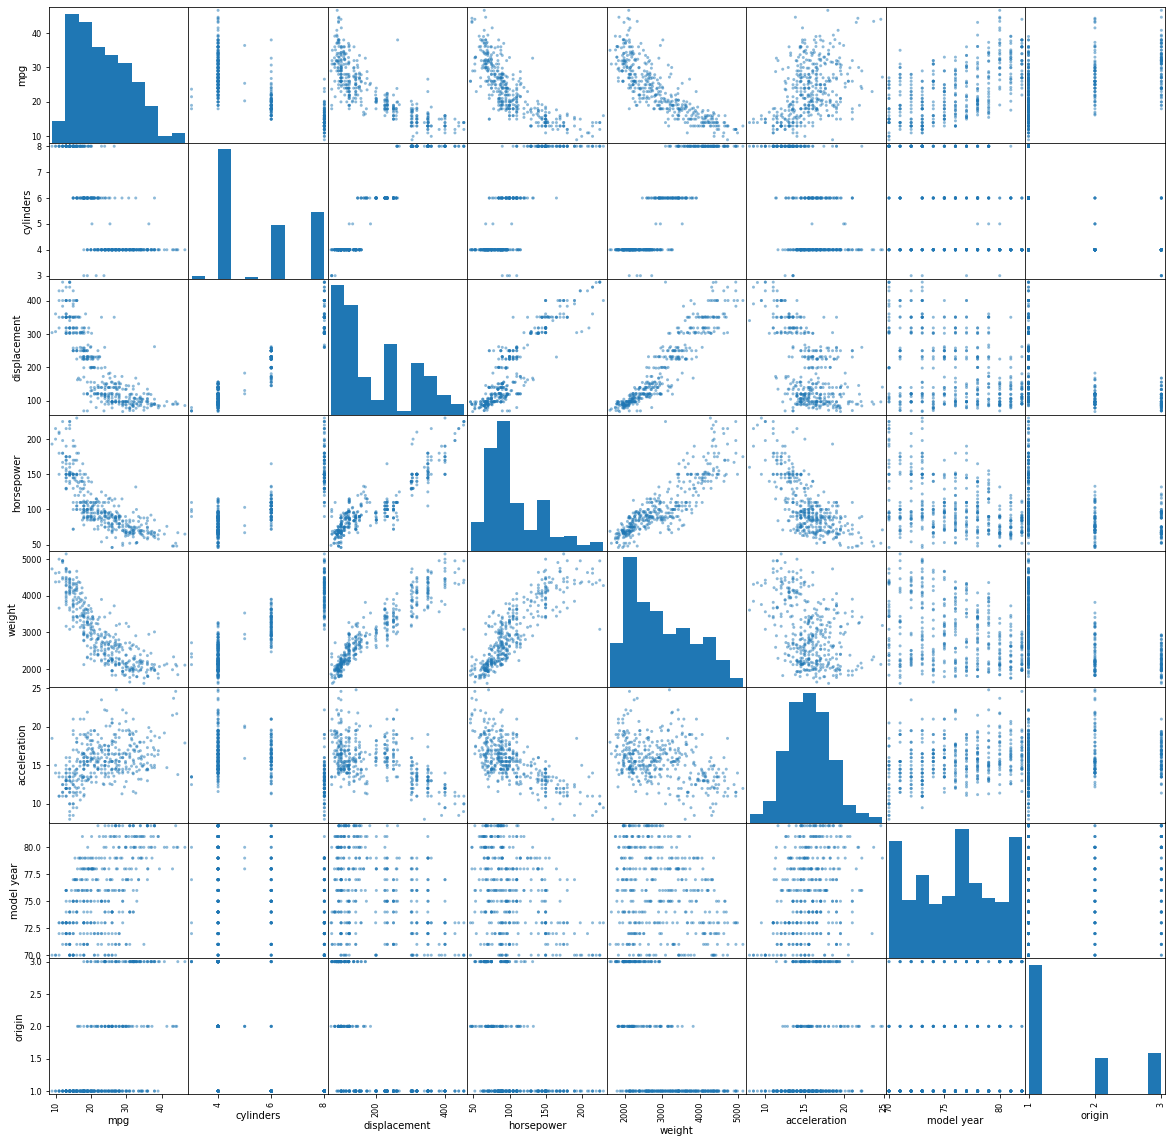

In [12]:
pd.plotting.scatter_matrix(df,figsize=(20,20))
plt.show()

<AxesSubplot:>

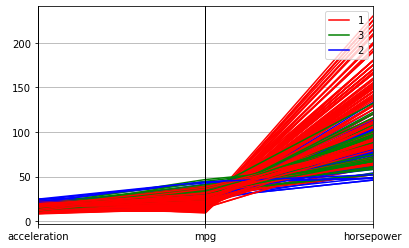

In [13]:
pd.plotting.parallel_coordinates(df,'origin',cols=['acceleration','mpg','horsepower'],color=['red','green','blue'])

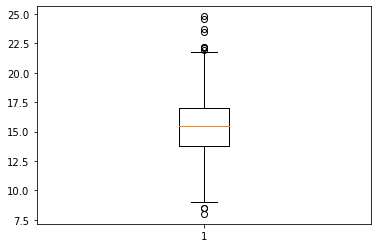

In [14]:
plt.boxplot(df[['acceleration']])
plt.show()

In [15]:
q1=df['acceleration'].quantile(0.25)
q3=df['acceleration'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5 * iqr
upper_bound=q3+1.5 * iqr

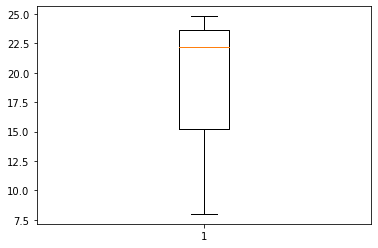

In [16]:
df=df[(df['acceleration']<lower_bound)|(df['acceleration']>upper_bound)]
plt.boxplot(df[['acceleration']])
plt.show()

In [17]:
df=pd.read_csv('Datasets/chile.csv')
df

,region,population,sex,age,education,income,statusquo,vote
0,N,175000,M,65.0,P,35000.0,1.00820,Y
1,N,175000,M,29.0,PS,7500.0,-1.29617,N
2,N,175000,F,38.0,P,15000.0,1.23072,Y
3,N,175000,F,49.0,P,35000.0,-1.03163,N
4,N,175000,F,23.0,S,35000.0,-1.10496,N
...,...,...,...,...,...,...,...,...
2695,M,15000,M,42.0,P,15000.0,-1.26247,N
2696,M,15000,F,28.0,P,15000.0,1.32950,Y
2697,M,15000,F,44.0,P,75000.0,1.42045,Y
2698,M,15000,M,21.0,S,75000.0,0.18315,NaN


In [18]:
df.nunique()

region           5
population      10
sex              2
age             53
education        3
income           7
statusquo     2092
vote             4
dtype: int64

In [19]:
df=df.dropna()
pd.crosstab(df['sex'],df['education'],rownames=['a'],colnames=['b'],margins=True,normalize=True)

b,P,PS,S,All
a,,,,
F,0.227067,0.075689,0.211436,0.514192
M,0.185109,0.096668,0.204031,0.485808
All,0.412176,0.172357,0.415467,1.000000


In [20]:
help(pd.crosstab)

Help on function crosstab in module pandas.core.reshape.pivot:

crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'
    Compute a simple cross tabulation of two (or more) factors. By default
    computes a frequency table of the factors unless an array of values and an
    aggregation function are passed.
    
    Parameters
    ----------
    index : array-like, Series, or list of arrays/Series
        Values to group by in the rows.
    columns : array-like, Series, or list of arrays/Series
        Values to group by in the columns.
    values : array-like, optional
        Array of values to aggregate according to the factors.
        Requires `aggfunc` be specified.
    rownames : sequence, default None
        If passed, must match number of row arrays passed.
    colnames : sequence, default None
        If passed, must match number of column arrays passed.

In [21]:
import pandas as pd
import numpy as np
df=pd.read_csv('Datasets/ipl-matches.csv')

df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [22]:
df.describe()

,ID,Margin
count,9.500000e+02,932.000000
mean,8.304852e+05,17.056867
std,3.375678e+05,21.633109
min,3.359820e+05,1.000000
25%,5.012612e+05,6.000000
50%,8.297380e+05,8.000000
75%,1.175372e+06,19.000000
max,1.312200e+06,146.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [24]:
df.nunique()

ID                 950
City                33
Date               706
Season              15
MatchNumber         80
Team1               18
Team2               18
Venue               49
TossWinner          18
TossDecision         2
SuperOver            2
WinningTeam         18
WonBy                4
Margin              94
method               1
Player_of_Match    262
Team1Players       932
Team2Players       937
Umpire1             58
Umpire2             60
dtype: int64

In [25]:
changed_name={'Delhi Daredevils':'Delhi Capitals','Kings XI Punjab':'Punjab Kings','Rising Pune Supergiants':'Rising Pune Supergiant'}
df=df.replace(changed_name.keys(),changed_name.values())
print(df)

          ID        City        Date   Season  MatchNumber  \
0    1312200   Ahmedabad  2022-05-29     2022        Final   
1    1312199   Ahmedabad  2022-05-27     2022  Qualifier 2   
2    1312198     Kolkata  2022-05-25     2022   Eliminator   
3    1312197     Kolkata  2022-05-24     2022  Qualifier 1   
4    1304116      Mumbai  2022-05-22     2022           70   
..       ...         ...         ...      ...          ...   
945   335986     Kolkata  2008-04-20  2007/08            4   
946   335985      Mumbai  2008-04-20  2007/08            5   
947   335984       Delhi  2008-04-19  2007/08            3   
948   335983  Chandigarh  2008-04-19  2007/08            2   
949   335982   Bangalore  2008-04-18  2007/08            1   

                           Team1                        Team2  \
0               Rajasthan Royals               Gujarat Titans   
1    Royal Challengers Bangalore             Rajasthan Royals   
2    Royal Challengers Bangalore         Lucknow Super Giant

In [28]:
df['WinningTeam']=df['WinningTeam'].dropna()

In [29]:
teams=df.Team1.unique()
y = pd.DataFrame()
data=[]
for team in teams:
    played=df[(df.Team1==team)|(df.Team2==team)].shape[0]
    win=df[df.WinningTeam==team].shape[0]
    home_win=((df[(df.WinningTeam==team) & (df.Team1==team)].shape[0]) / df[df.Team1==team].shape[0])*100
    away_win=((df[(df.WinningTeam==team) & (df.Team2==team)].shape[0]) / df[df.Team2==team].shape[0])*100
    data.append([teams,played,(win/played)*100,home_win,away_win])
y[['team','match_played','win%','home%','away%']]=data
y


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,team,match_played,win%,home%,away%
0,"[Rajasthan Royals, Royal Challengers Bangalore...",192,50.000000,55.056180,45.631068
1,"[Rajasthan Royals, Royal Challengers Bangalore...",226,48.230088,48.412698,48.000000
2,"[Rajasthan Royals, Royal Challengers Bangalore...",152,49.342105,52.173913,46.987952
3,"[Rajasthan Royals, Royal Challengers Bangalore...",224,45.982143,46.491228,45.454545
4,"[Rajasthan Royals, Royal Challengers Bangalore...",208,58.173077,58.558559,57.731959
5,"[Rajasthan Royals, Royal Challengers Bangalore...",16,75.000000,57.142857,88.888889
6,"[Rajasthan Royals, Royal Challengers Bangalore...",15,60.000000,87.500000,28.571429
7,"[Rajasthan Royals, Royal Challengers Bangalore...",223,51.121076,53.333333,49.152542
8,"[Rajasthan Royals, Royal Challengers Bangalore...",218,46.330275,45.454545,47.222222
9,"[Rajasthan Royals, Royal Challengers Bangalore...",231,56.709957,58.035714,55.462185


In [30]:
teams=df.Team1.unique()
y = pd.DataFrame()
data=[]
for team in teams:
    played=df[(df.Team1==team)|(df.Team2==team) & (df.Season=='2022')].shape[0]
    win=df[(df.WinningTeam==team)& (df.Season=='2022')].shape[0]
    points=win*2
    data.append([teams,played,(win/played)*100,points])
y[['team','match_played','win%','points']]=data
y


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,team,match_played,win%,points
0,"[Rajasthan Royals, Royal Challengers Bangalore...",93,10.752688,20
1,"[Rajasthan Royals, Royal Challengers Bangalore...",133,6.766917,18
2,"[Rajasthan Royals, Royal Challengers Bangalore...",80,7.500000,12
3,"[Rajasthan Royals, Royal Challengers Bangalore...",123,5.691057,14
4,"[Rajasthan Royals, Royal Challengers Bangalore...",115,3.478261,8
5,"[Rajasthan Royals, Royal Challengers Bangalore...",16,75.000000,24
6,"[Rajasthan Royals, Royal Challengers Bangalore...",15,60.000000,18
7,"[Rajasthan Royals, Royal Challengers Bangalore...",114,5.263158,12
8,"[Rajasthan Royals, Royal Challengers Bangalore...",115,6.086957,14
9,"[Rajasthan Royals, Royal Challengers Bangalore...",121,3.305785,8


In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('Datasets/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
print(df.describe())



       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [34]:
print(df.describe(exclude=np.number))

                              Name   Sex    Ticket Cabin Embarked
count                          891   891       891   204      889
unique                         891     2       681   147        3
top     Andreasson, Mr. Paul Edvin  male  CA. 2343    G6        S
freq                             1   577         7     4      644


In [36]:
print(df.describe(include='all'))

        PassengerId    Survived      Pclass                        Name   Sex  \
count    891.000000  891.000000  891.000000                         891   891   
unique          NaN         NaN         NaN                         891     2   
top             NaN         NaN         NaN  Andreasson, Mr. Paul Edvin  male   
freq            NaN         NaN         NaN                           1   577   
mean     446.000000    0.383838    2.308642                         NaN   NaN   
std      257.353842    0.486592    0.836071                         NaN   NaN   
min        1.000000    0.000000    1.000000                         NaN   NaN   
25%      223.500000    0.000000    2.000000                         NaN   NaN   
50%      446.000000    0.000000    3.000000                         NaN   NaN   
75%      668.500000    1.000000    3.000000                         NaN   NaN   
max      891.000000    1.000000    3.000000                         NaN   NaN   

               Age       Si

In [37]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [38]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,survived,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
d={0:'died',1:'survived'}
df['Survived']=df['Survived'].replace(d.keys(),d.values())
new=pd.Categorical(df['Survived'])
new=new.rename_categories(['Died','Survived'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,died,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,survived,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,died,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,survived,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
c_cabin=df['Cabin'].astype('str')
c_cabin=np.array([cabin[0] for cabin in c_cabin])
new_cab=pd.Categorical(c_cabin)
new_cab.describe()
df['Cabin']=new_cab
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,n,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,n,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


In [18]:
c=df.Cabin.unique()
y=pd.DataFrame()
data=[]
for i in c:
    survive=df[(df.Cabin==i) & (df.Survived=='survived')].shape[0]
    died=df[(df.Cabin==i) & (df.Survived=='died')].shape[0]
    data.append([i,survive,died])
y[['Cabin','Survived','Died']]=data
y

,Cabin,Survived,Died
0,n,206,481
1,C,35,24
2,E,24,8
3,G,2,2
4,D,25,8
5,A,7,8
6,B,35,12
7,F,8,5
8,T,0,1


In [3]:
pd.crosstab(df['Cabin'],df['Survived'],rownames=['V'],colnames=['J'])

J,0,1
V,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2
T,1,0
n,481,206


In [20]:
df['Age']=df['Age'].fillna(df["Age"].mean())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,died,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,n,S
1,2,survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C
2,3,survived,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,n,S
3,4,survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S
4,5,died,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,n,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,died,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,n,S
887,888,survived,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S
888,889,died,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,n,S
889,890,survived,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C


In [7]:
bins=[0,12,18,30,50,100]
labels=['child','teenager','young adult','adult','senior']
df["AgeGrp"]=pd.cut(df['Age'],bins=bins,labels=labels)
pd.crosstab([df['AgeGrp'],df['Sex']],df['Survived'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGrp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S,young adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S,young adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,S,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,n,S,young adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,young adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,n,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,young adult


<AxesSubplot:>

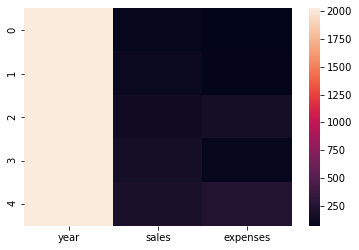

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data={
    'year':[2021,2022,2023,2024,2025],
    'sales':[100,120,150,170,200],
    'expenses':[70,80,170,100,250]    
}
df=pd.DataFrame(data)
df
sns.heatmap(data=df)

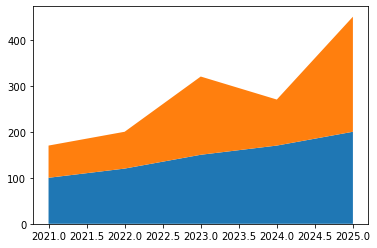

In [20]:

plt.stackplot(df.year,df.sales,df.expenses,labels=['sales','expenses'])


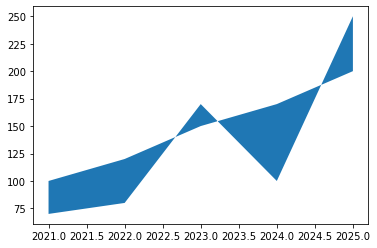

In [23]:
fig,ax=plt.subplots()
ax.fill_between(df.year,df.sales,df.expenses)

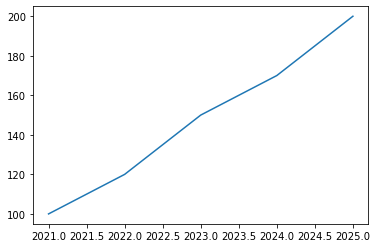

In [26]:
fig,ax=plt.subplots()
ax.plot(df.year,df.sales)


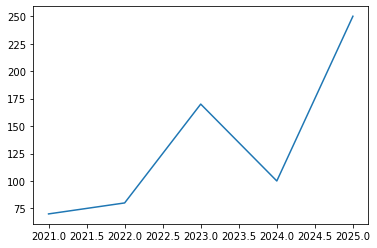

In [27]:
fig,ax=plt.subplots()
ax.plot(df.year,df.expenses)

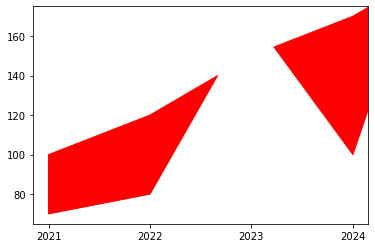

In [28]:
fig,ax=plt.subplots()
ax.set_xticks([2021,2022,2023,2024,2025])
ax.fill_between(df.year,df.sales,df.expenses,where=df.sales>df.expenses,color='red',interpolate=True)

In [29]:
import pandas as pd
import numpy as np
df=pd.read_csv('Datasets/auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Text(0.5, 0.98, 'Graph')

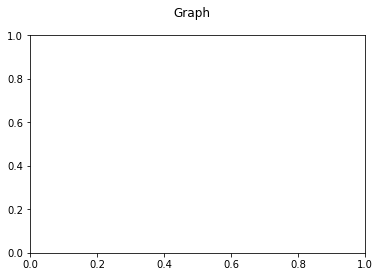

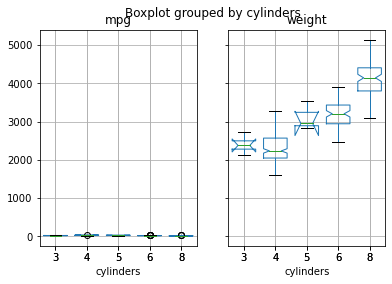

In [37]:
fig,ax=plt.subplots()
df.boxplot(column=['mpg','weight'],widths=0.75,notch=True,by='cylinders')
fig.suptitle("Graph")

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

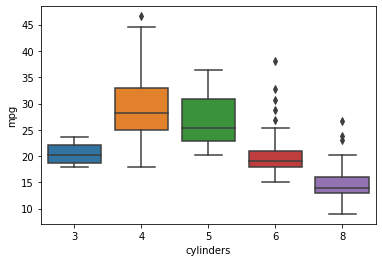

In [36]:
import seaborn as sns
sns.boxplot(x=df.cylinders,y=df.mpg,data=df)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('Datasets/auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


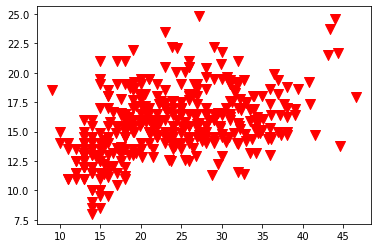

In [6]:
plt.scatter(df['mpg'],df['acceleration'],marker='v',s=100,color='red')


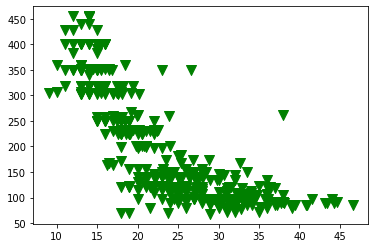

In [8]:
plt.scatter(df['mpg'],df['displacement'],marker='v',s=100,color='green')

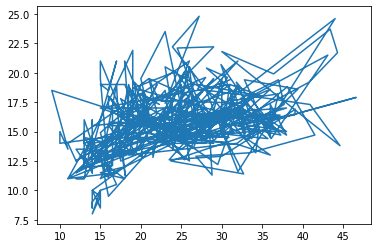

In [9]:
plt.plot(df['mpg'],df['acceleration'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg', ylabel='acceleration'>

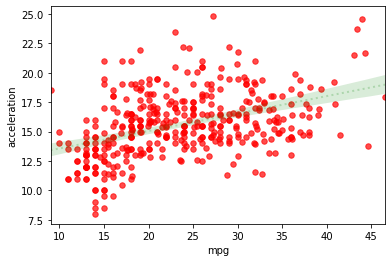

In [15]:
import seaborn as sns
import numpy as np
sns.regplot(df.mpg,df.acceleration,scatter_kws={'color':'red','s':30,'alpha':0.7},line_kws={'color':'green','lw':2,'ls':':','alpha':0.2})

In [16]:
data=np.random.randint(low=1,high=100,size=(10,10))
print(data)

[[75 76 14 50 61 75 83 66 13 91]
 [64 45  8 77 19 15 71 71 79 91]
 [ 4 66 44 94 76 62 40 13 69 61]
 [31 26 11 32 41 53 52 98 42 45]
 [72 19 56 67 17 34 38 79 28 30]
 [42 96 52 60 87 92  5 65 17 48]
 [14 19 86 66 12 57 30 86 54 29]
 [94 71 88 51 91 56 61 69 41 40]
 [47 83  7  8 99  8 12  7 67 17]
 [28 83 61 56 76 11 94 35 39 97]]


<AxesSubplot:>

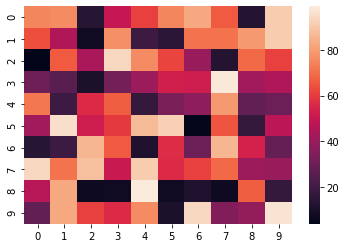

In [17]:
sns.heatmap(data=data)

<AxesSubplot:>

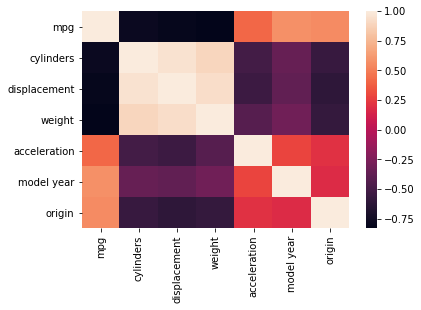

In [18]:
sns.heatmap(data=df.corr())

<AxesSubplot:>

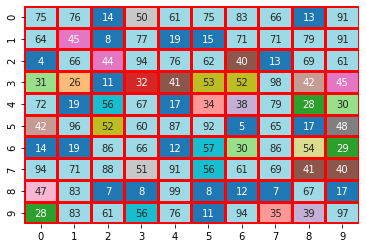

In [24]:
sns.heatmap(data=data,annot=True,vmax=60,vmin=20,cmap='tab20',linewidths=2,linecolor='red',cbar=False)

In [33]:
from pywaffle import Waffle
data={
    'c':['A','B','C','D'],
    'v':[20,35,15,30]
     }
df=pd.DataFrame(data)
df

,c,v
0,A,20
1,B,35
2,C,15
3,D,30


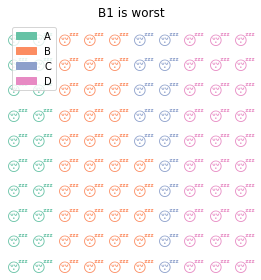

In [57]:
fig = plt.figure(FigureClass=Waffle,rows=10,values=df['v'],labels=list(df['c']),legend={'loc':'upper left'},characters='😴')
plt.title('B1 is worst')
plt.show()

In [43]:
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)
print(stopwords)

{'can', 'therefore', 'get', 'where', 'have', "you'll", 'those', "we're", 'were', 'my', 'our', 'was', 'but', 'once', 'are', "wasn't", "i'll", 'as', "shan't", 'been', "they've", 'about', 'them', 'an', 'myself', "where's", 'a', 'of', 'yourself', 'more', "what's", 'who', 'all', "he'd", 'his', "let's", "there's", 'you', 'between', 'by', "couldn't", 'own', "why's", 'ought', 'is', 'why', "who's", 'there', "she'll", 'her', 'its', 'ours', 'with', "hadn't", "aren't", 'k', 'very', 'few', 'would', "hasn't", 'whom', 'into', 'further', "when's", 'during', 'while', 'each', "don't", "haven't", 'most', 'r', 'through', 'had', "she's", 'did', 'some', 'out', 'yourselves', 'before', 'from', 'she', "they'd", 'he', "i've", 'do', 'same', 'for', 'below', 'not', 'only', 'their', 'too', 'again', 'because', "isn't", 'also', 'when', 'off', 'or', 'the', 'your', 'other', 'and', 'above', "shouldn't", 'over', 'then', 'should', "that's", "we'd", 'being', "he'll", 'nor', 'we', 'which', 'what', "i'm", 'com', 'http', 'cou

In [46]:
import requests
url='https://www.gutenberg.org/files/11/11-0.txt'
response=requests.get(url)
text=response.text
text

'*** START OF THE PROJECT GUTENBERG EBOOK 11 ***\r\n[Illustration]\r\n\r\n\r\n\r\n\r\nAlice’s Adventures in Wonderland\r\n\r\nby Lewis Carroll\r\n\r\nTHE MILLENNIUM FULCRUM EDITION 3.0\r\n\r\nContents\r\n\r\n CHAPTER I.     Down the Rabbit-Hole\r\n CHAPTER II.    The Pool of Tears\r\n CHAPTER III.   A Caucus-Race and a Long Tale\r\n CHAPTER IV.    The Rabbit Sends in a Little Bill\r\n CHAPTER V.     Advice from a Caterpillar\r\n CHAPTER VI.    Pig and Pepper\r\n CHAPTER VII.   A Mad Tea-Party\r\n CHAPTER VIII.  The Queen’s Croquet-Ground\r\n CHAPTER IX.    The Mock Turtle’s Story\r\n CHAPTER X.     The Lobster Quadrille\r\n CHAPTER XI.    Who Stole the Tarts?\r\n CHAPTER XII.   Alice’s Evidence\r\n\r\n\r\n\r\n\r\nCHAPTER I.\r\nDown the Rabbit-Hole\r\n\r\n\r\nAlice was beginning to get very tired of sitting by her sister on the\r\nbank, and of having nothing to do: once or twice she had peeped into\r\nthe book her sister was reading, but it had no pictures or\r\nconversations in it, “an

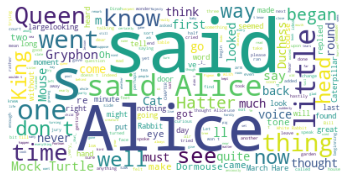

In [52]:
alice_wc=WordCloud(background_color='white',max_words=2000,stopwords=stopwords)
alice_wc.generate(text)
plt.imshow(alice_wc)
plt.axis('off')
plt.show()

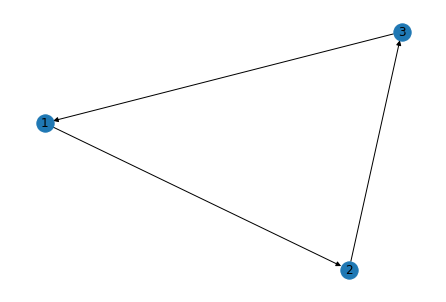

In [56]:
import networkx as nx
g=nx.DiGraph()
g.add_node(1)
g.add_node(2)
g.add_node(3)
g.add_edge(1,2)
g.add_edge(2,3)
g.add_edge(3,1)
nx.draw(g,with_labels=True)
plt.show()

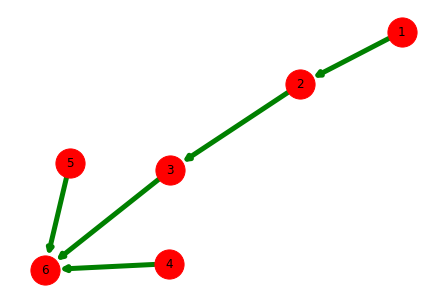

In [60]:
import networkx as nx
g=nx.DiGraph()
g.add_node(1)
g.add_nodes_from([2,3])
g.add_nodes_from(range(4,7))
g.add_edge(1,2)
g.add_edge(1,1)
g.add_edges_from([(2,3),(3,6),(4,6),(5,6)])
nx.draw(g,with_labels=True,node_size=850,node_color='red',width=5,edge_color='green')
plt.show()

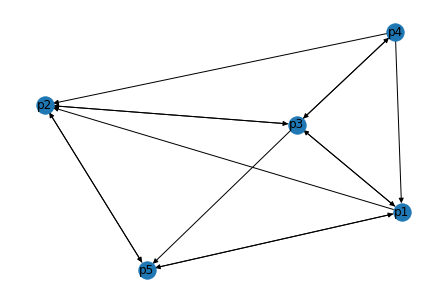

In [66]:
import networkx as nx
insta={
    'p1':[0,1,1,0,1],
    'p2':[0,0,1,0,1],
    'p3':[1,1,0,1,1],
    'p4':[1,1,1,0,0],
    'p5':[1,1,0,0,0],
}

g=nx.DiGraph()
g.add_nodes_from(insta.keys())
for i ,follower in enumerate(insta):
    for j,follows in enumerate(insta[follower]):
        if follows:
            g.add_edge(follower,list(insta.keys())[j])
nx.draw(g,with_labels=True)
plt.show()